In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct

C:\Users\illic\AppData\Local\Temp\ipykernel_18212\434127054.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
main_dir = r'C:\Users\illic\Python\data_hiwi'

In [3]:
# set paths to specific data
WS100_rtu_path = os.path.join(main_dir, r'WS100_ready_to_use.csv')
WS300_rtu_path = os.path.join(main_dir, r'WS300_ready_to_use.csv')
Raine_rtu_path = os.path.join(main_dir, r'Raine_ready_to_use.csv')
L_pcp_rtu_path = os.path.join(main_dir, r'L_pcp_ready_to_use.csv')

In [5]:
# read data

# read data and convert to utc
WS100_rtu = pd.read_csv(WS100_rtu_path, sep=',', index_col=0) # , skiprows=1
WS100_rtu.index = pd.to_datetime(WS100_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300_rtu = pd.read_csv(WS300_rtu_path, sep=',', index_col=0) # , skiprows=1
WS300_rtu.index = pd.to_datetime(WS300_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine_rtu = pd.read_csv(Raine_rtu_path, sep=',', index_col=0) # , skiprows=1
Raine_rtu.index = pd.to_datetime(Raine_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp_rtu = pd.read_csv(L_pcp_rtu_path, sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

In [29]:
# precipitation_type

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

In [30]:
# Correct data manually

# Set extreme in 'precipitation.1' to nan
WS100_rtu['precipitation.1'][WS100_rtu['precipitation.1'] == WS100_rtu['precipitation.1'].max()] = np.nan

C:\Users\illic\AppData\Local\Temp\ipykernel_18212\3284140338.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WS100_rtu['precipitation.1'][WS100_rtu['precipitation.1'] == WS100_rtu['precipitation.1'].max()] = np.nan


In [31]:
# set extreme in 'precipitation.2' to nan
WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

C:\Users\illic\AppData\Local\Temp\ipykernel_18212\876287713.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan


In [32]:
WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

C:\Users\illic\AppData\Local\Temp\ipykernel_18212\3150760233.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan


In [33]:
# WS100_rtu # precipitation.1/.2 Regenmenge differenziell

In [34]:
# WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] != WS100_rtu['precipitation.1']].count()

In [35]:
# index start
# '2021-10-20 17:00:00'
# index ende
# '2023-10-20 16:21:00'

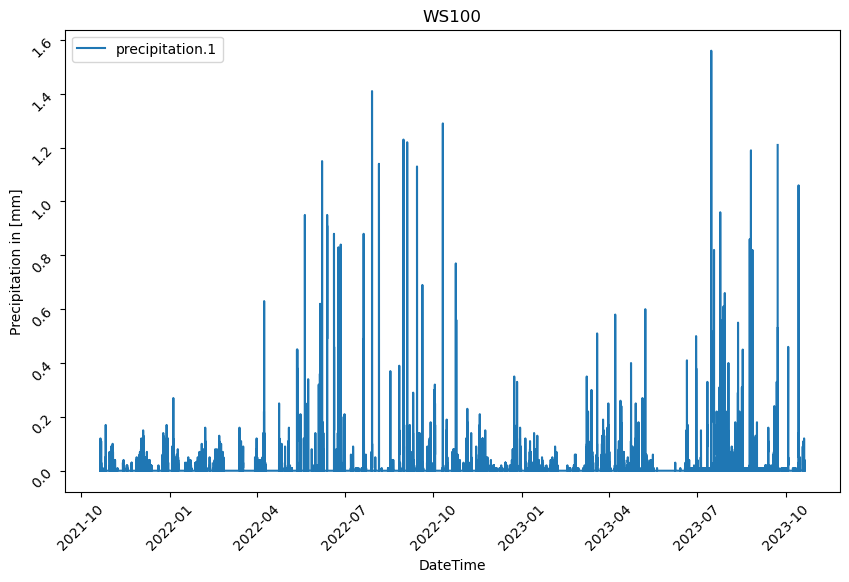

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(WS100_rtu.index, WS100_rtu['precipitation.1'], label='precipitation.1')
ax.set_title('WS100')
ax.set_xlabel('DateTime')
ax.set_ylabel('Precipitation in [mm]')

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.legend()

plt.show()
plt.close()

In [37]:
#start end '2020-10-23 09:00:00' : '2023-10-23 08:46:00'

In [38]:
# WS300_rtu # precipitation.1 Regenmenge differenziell

In [39]:
# fct.sum_curve(WS300_rtu, 'precipitation.1', '2020-10-23 09:00:00', '2023-10-23 08:46:00')

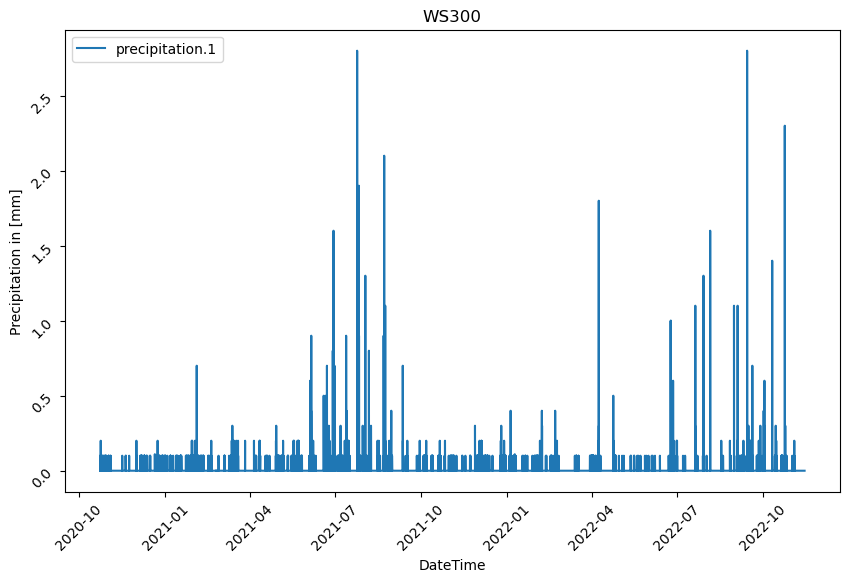

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))

column = 'precipitation.1'

ax.plot(WS300_rtu.index, WS300_rtu[column], label=column)
ax.set_title('WS300')
ax.set_xlabel('DateTime')
ax.set_ylabel('Precipitation in [mm]')

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.legend()

plt.show()
plt.close()

In [41]:
# Raine_rtu

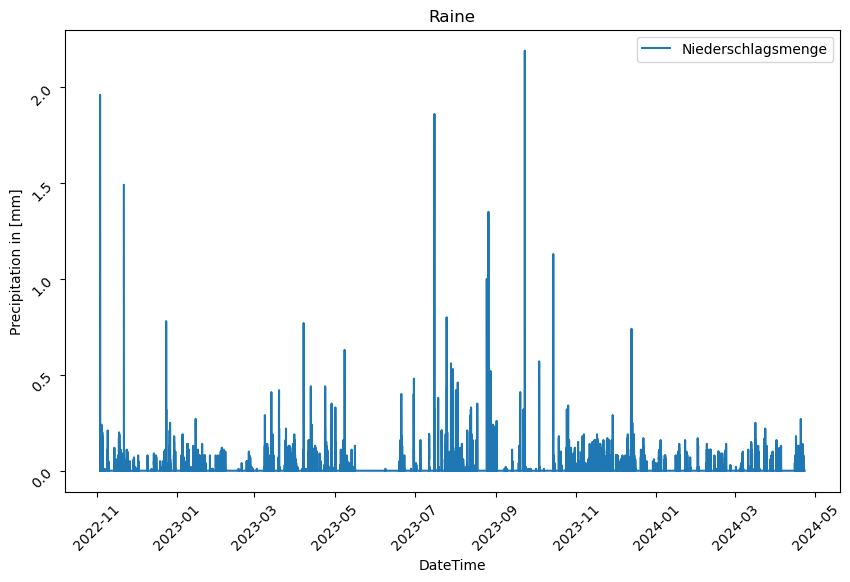

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

column = 'Niederschlagsmenge'

ax.plot(Raine_rtu.index, Raine_rtu[column], label=column)
ax.set_title('Raine')
ax.set_xlabel('DateTime')
ax.set_ylabel('Precipitation in [mm]')

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.legend()

plt.show()
plt.close()

In [43]:
# L_pcp_rtu

In [44]:
# L_pcp_rtu['rr_10'].max()

In [45]:
# L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()].index

In [46]:
L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

C:\Users\illic\AppData\Local\Temp\ipykernel_18212\2001331829.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan


In [47]:
L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

C:\Users\illic\AppData\Local\Temp\ipykernel_18212\2001331829.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan


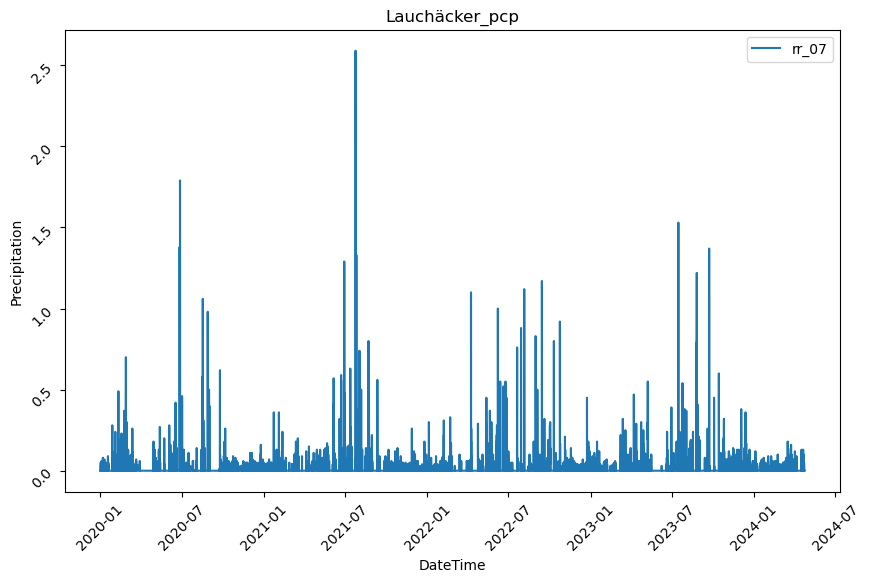

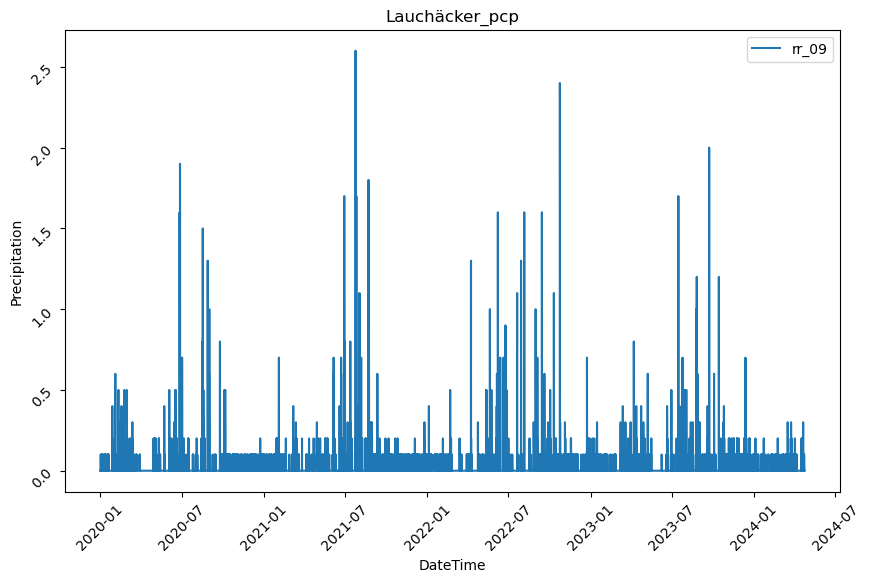

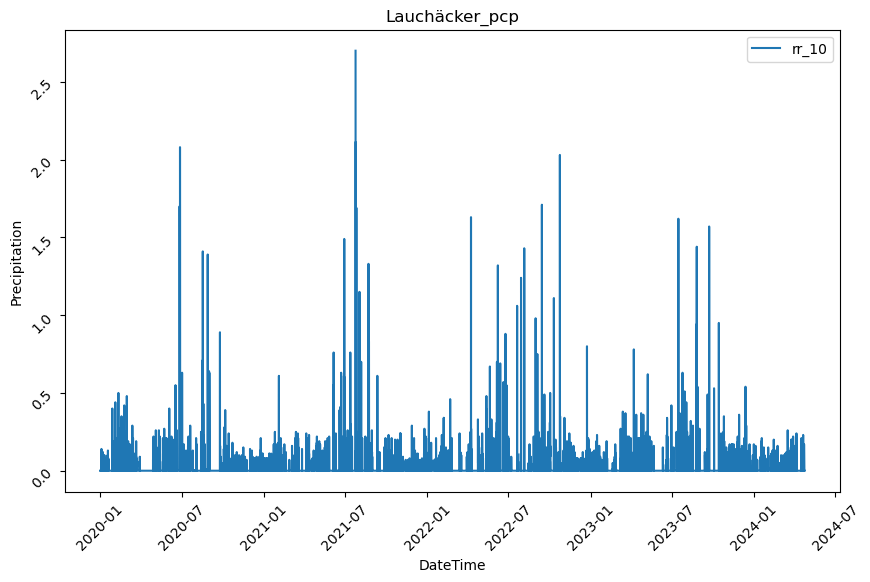

In [48]:
for column in L_pcp_rtu.columns:

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(L_pcp_rtu.index, L_pcp_rtu[column], label=column)
    ax.set_title('Lauchäcker_pcp')
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Precipitation')

    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.legend()

    plt.show()
    plt.close()